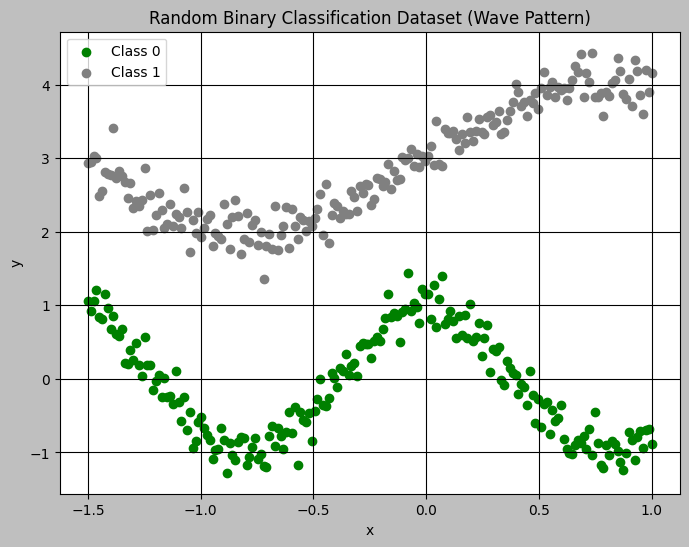

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(plt.style.available[10])

# Set the random seed for reproducibility
np.random.seed(42)

# Generate x-coordinates for both classes
x = np.linspace(-1.5, 1, 200)

# Generate y-coordinates for class 0 (lower wave)
y0 = np.cos(4 * x) + np.random.normal(0, 0.2, 200)

# Generate y-coordinates for class 1 (upper wave)
y1 = np.sin(2 * x) + np.random.normal(3, 0.2, 200)

# Combine the coordinates into a single dataset
X = np.vstack((np.column_stack((x, y0)), np.column_stack((x, y1))))

# Create labels for the dataset
y = np.hstack((np.zeros(200), np.ones(200)))

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:200, 0], X[:200, 1], color='green', label='Class 0')
plt.scatter(X[200:, 0], X[200:, 1], color='gray', label='Class 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Binary Classification Dataset (Wave Pattern)')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
X.shape, y.shape

((400, 2), (400,))

In [3]:
X

array([[-1.5       ,  1.05951312],
       [-1.48743719,  0.9172703 ],
       [-1.47487437,  1.05682814],
       [-1.46231156,  1.21192259],
       [-1.44974874,  0.83822146],
       [-1.43718593,  0.8137258 ],
       [-1.42462312,  1.14972422],
       [-1.4120603 ,  0.9585918 ],
       [-1.39949749,  0.68040056],
       [-1.38693467,  0.85004319],
       [-1.37437186,  0.61421129],
       [-1.36180905,  0.57732785],
       [-1.34924623,  0.68075251],
       [-1.33668342,  0.20999376],
       [-1.3241206 ,  0.20645977],
       [-1.31155779,  0.39638715],
       [-1.29899497,  0.26239509],
       [-1.28643216,  0.48275358],
       [-1.27386935,  0.19218197],
       [-1.26130653,  0.04426504],
       [-1.24874372,  0.57196966],
       [-1.2361809 ,  0.1850948 ],
       [-1.22361809,  0.19458455],
       [-1.21105528, -0.15349905],
       [-1.19849246, -0.02738614],
       [-1.18592965,  0.05350901],
       [-1.17336683, -0.24911923],
       [-1.16080402,  0.00602185],
       [-1.14824121,

In [4]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Define the sequential MLP

Let's make it have 1 hidden layer.

In [5]:
from smolgrad import Tensor, optims
import smolgrad.nn as nn

in_feats, out_feats = 2, 1

model = nn.Sequential(
    nn.Linear(in_feats, 5),
    nn.ReLU(),
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, out_feats),
    nn.Sigmoid()    
)

len(model.parameters())

6

### Training

In [6]:
# data

X_train = Tensor(X.tolist())
y_train = Tensor(y.tolist())

print("Training data: ", X_train)
print("Training data shape: ", X_train.shape)
print("Labels: ", y_train)
print("Labels shape: ", y_train.shape)

Training data:  Tensor(array([[-1.5, 1.05951],
       [-1.48744, 0.91727],
       [-1.47487, 1.05683],
       ...,
       [0.974874, 4.19983],
       [0.987437, 3.89656],
       [1, 4.15686]], dtype=float32), is_mlx_tensor=True)
Training data shape:  (400, 2)
Labels:  Tensor(array([0, 0, 0, ..., 1, 1, 1], dtype=float32), is_mlx_tensor=True)
Labels shape:  (400,)


In [7]:
# learning rate, loss function, and optimizer

lr = 0.009
epochs = 450

loss_fn = nn.BCELoss()
optim = optims.SGD(model.parameters(), lr=lr)

loss_fn, optim

(<smolgrad.nn._losses.BCELoss at 0x10764a0e0>,
 <smolgrad.optims.sgd_momentum.SGD at 0x107649600>)

In [8]:
# setup wandb
import wandb

wandb.init(
    project="smolgrad-vs-torch",
    config={
        "learning_rate": lr,
        "epochs": epochs
    },
)

In [9]:
example_output = model(X_train)
example_output.reshape(-1)

Tensor(array([0.0753174, 0.0747797, 0.0758147, ..., 0.147632, 0.138252, 0.148098], dtype=float32), requires_grad=True, is_mlx_tensor=True)

In [10]:
# training loop
import tqdm
import time

loop = tqdm.tqdm(range(epochs))
losses = []

start = time.time()
for epoch in loop:
    y_pred = model(X_train).reshape(-1)
    loss: Tensor = loss_fn(y_pred, y_train)

    optim.zero_grad()
    loss.backward()
    optim.step()

    lossval = loss.data.item()

    losses.append(lossval)
    loop.set_postfix(loss=lossval)
    
    wandb.log({"loss": lossval})

end = time.time()
print(f"Finished training in {end - start} seconds...")

100%|██████████| 450/450 [00:00<00:00, 592.74it/s, loss=0.152]

Finished training in 0.759343147277832 seconds...


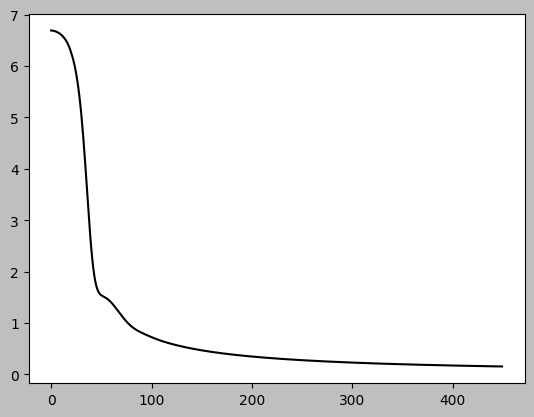

In [11]:
plt.plot(losses)
plt.show()

### Predictions

In [12]:
from smolgrad.core.engine import no_grad

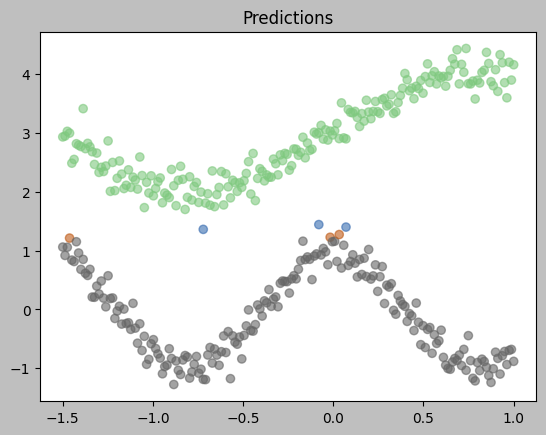

In [13]:
with no_grad():
    preds = model(X_train).data.reshape(-1)

plt.title('Predictions')
plt.scatter(X[:, 0], X[:, 1], alpha=.6, c=preds, cmap='Accent_r')
plt.show()

### Decision boundary

In [14]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

In [15]:
xx, yy, xx.shape, yy.shape

(array([[-2.  , -1.98, -1.96, ...,  1.44,  1.46,  1.48],
        [-2.  , -1.98, -1.96, ...,  1.44,  1.46,  1.48],
        [-2.  , -1.98, -1.96, ...,  1.44,  1.46,  1.48],
        ...,
        [-2.  , -1.98, -1.96, ...,  1.44,  1.46,  1.48],
        [-2.  , -1.98, -1.96, ...,  1.44,  1.46,  1.48],
        [-2.  , -1.98, -1.96, ...,  1.44,  1.46,  1.48]]),
 array([[-1.77518237, -1.77518237, -1.77518237, ..., -1.77518237,
         -1.77518237, -1.77518237],
        [-1.75518237, -1.75518237, -1.75518237, ..., -1.75518237,
         -1.75518237, -1.75518237],
        [-1.73518237, -1.73518237, -1.73518237, ..., -1.73518237,
         -1.73518237, -1.73518237],
        ...,
        [ 4.88481763,  4.88481763,  4.88481763, ...,  4.88481763,
          4.88481763,  4.88481763],
        [ 4.90481763,  4.90481763,  4.90481763, ...,  4.90481763,
          4.90481763,  4.90481763],
        [ 4.92481763,  4.92481763,  4.92481763, ...,  4.92481763,
          4.92481763,  4.92481763]]),
 (336, 175),
 (3

In [16]:
xx_flat, yy_flat = xx.reshape(-1), yy.reshape(-1)
xx_flat.shape, yy_flat.shape

((58800,), (58800,))

In [17]:
data = np.vstack([xx_flat, yy_flat]).T
data

array([[-2.        , -1.77518237],
       [-1.98      , -1.77518237],
       [-1.96      , -1.77518237],
       ...,
       [ 1.44      ,  4.92481763],
       [ 1.46      ,  4.92481763],
       [ 1.48      ,  4.92481763]])

In [18]:
tensordata = Tensor(data.tolist())

In [19]:
with no_grad():
    preds = model(tensordata)

In [20]:
preds_flat = preds.data.reshape(-1)
preds_flat

array([3.46551e-05, 3.57863e-05, 3.69543e-05, ..., 1, 1, 1], dtype=float32)

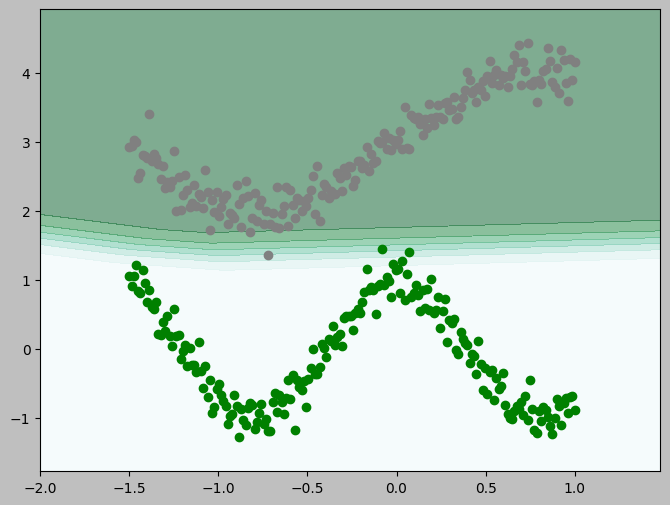

In [21]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds.data.reshape(xx.shape), cmap='BuGn', alpha=0.5)
plt.scatter(X[:200, 0], X[:200, 1], c='green', label='Class 0')
plt.scatter(X[200:, 0], X[200:, 1], c='grey', label='Class 1')
plt.show()